In [1]:
import numpy as np
import matplotlib.pyplot as plt
from collections import deque, defaultdict
from GridWorld import GridWorld

In [2]:
class Q_learning():
    def __init__(self, environment, epsilon=0.05, alpha=0.01, gamma=0.99):
        self.Q_table = defaultdict(lambda: np.zeros(4)) # Q_table = {"state":(Q(s,UP),Q(s,DOWN),Q(s,LEFT),Q(s,RIGHT),)}
        self.epsilon = epsilon
        self.alpha = alpha
        self.gamma = gamma
        self.actions = environment.actions # ['UP', 'DOWN', 'LEFT', 'RIGHT']
        self.env_row_max = environment.row_max
        self.env_col_max = environment.col_max

    def action(self, state):
        '''
        In this code, you have to implement the behavior policy (epsilon-greedy policy) w.r.t. the Q-table.
        The policy takes a state and then samples an action among  ['UP', 'DOWN', 'LEFT', 'RIGHT'],
        and you can index the above actions as [0, 1, 2, 3]. Use "self.epsilon" and "self.Q_table".
        '''
        #your codes here

        action_indexes = np.array([0, 1, 2, 3])
        if np.random.rand(1) < self.epsilon :
            action_index = np.random.choice(action_indexes)
        else:
            action_index = np.argmax(self.Q_table[state])

        return self.actions[action_index]

    def update(self, current_state, next_state, action, reward):
        '''
        In this code, you should implement Q-learning update rule.
        '''
        # your codes here

        action_indexes = {'UP' : 0, 'DOWN' : 1, 'LEFT' : 2, 'RIGHT' : 3}

        action_index = action_indexes[action]
        self.Q_table[current_state][action_index] += self.alpha*(reward + self.gamma*np.max(self.Q_table[next_state]) - self.Q_table[current_state][action_index])
              

    def get_max_Q_function(self):
        '''
        This code gives max_a Q(s,a) for each state to us. The output of this code should be a form of "list".
        Therefore, the output "max_Q_table = [max_a Q(s,a)] = [max_a Q((row_index, col_index),a)]",
         and you already found the index of state "s" in GridWorld.py.
        '''
        max_Q_table = np.zeros((self.env_row_max, self.env_col_max))
    
        # your codes here
        for i in range(self.env_row_max):
            for j in range(self.env_col_max):
                max_Q_table[(i,j)] = np.max(self.Q_table[(i, j)])
        
        return max_Q_table

In [3]:
class Double_Q_learning():
    def __init__(self, environment, epsilon=0.05, alpha=0.01, gamma=0.99):
        self.Q1 = defaultdict(lambda: np.zeros(4)) # Q_table = {"state":(Q(s,UP),Q(s,DOWN),Q(s,LEFT),Q(s,RIGHT),)}
        self.Q2 = defaultdict(lambda: np.zeros(4))
        self.Q_table = defaultdict(lambda: np.zeros(4))
        self.epsilon = epsilon
        self.alpha = alpha
        self.gamma = gamma
        self.actions = environment.actions # ['UP', 'DOWN', 'LEFT', 'RIGHT']
        self.env_row_max = environment.row_max
        self.env_col_max = environment.col_max

    def action(self, state):
        '''
        you have to implement the behavior policy (epsilon-greedy policy) w.r.t. the Q-table.
        '''
        # your codes here

        action_indexes = np.array([0, 1, 2, 3])
        if np.random.rand(1) < self.epsilon :
            action_index = np.random.choice(action_indexes)
        else:
            self.Q_table[state] =  self.Q1[state] + self.Q2[state]     

            action_index = np.argmax(self.Q_table[state])

        return self.actions[action_index]


    def update(self, current_state, next_state, action, reward):
        '''
        This code should contain the Double Q-learning update rule.

        '''
        # your codes here
        action_indexes = {'UP' : 0, 'DOWN' : 1, 'LEFT' : 2, 'RIGHT' : 3}
        action_index = action_indexes[action]

        a = np.random.choice(np.array([1,2]))
        if a == 1:
            self.Q1[current_state][action_index] += self.alpha*(reward + self.gamma*np.max(self.Q2[next_state]) - self.Q1[current_state][action_index])
        
        else:
            self.Q2[current_state][action_index] += self.alpha*(reward + self.gamma*np.max(self.Q1[next_state]) - self.Q2[current_state][action_index])


    def get_max_Q_function(self):
        max_Q_table = np.zeros((self.env_row_max, self.env_col_max))
        
        # your codes here

        for i in range(self.env_row_max):
            for j in range(self.env_col_max):
                max_Q_table[(i,j)] = np.max(self.Q_table[(i, j)])
        
        return max_Q_table


In [5]:
def play(environment, agent, num_episodes=10000, episode_length=1000, train=True):
    reward_per_episode = []
    returns = deque(maxlen=100)

    for episode in range(num_episodes):
        timestep = 0
        terminal = False
        while timestep < episode_length and terminal != True:
            current_state = environment.agent_location
            action = agent.action(current_state)
            next_state, reward, terminal = environment.make_step(action)
            timestep += 1

            if train == True:
                agent.update(current_state, next_state, action, reward)

            if terminal == True:
                episode_return = environment.reset()

        returns.append(episode_return)
        reward_per_episode.append(np.mean(returns))

    return reward_per_episode



In [22]:
def main():
    np.random.seed(1)
    # Set hyperparameters ([!] you can modify for analyzing algorithms you will implement)
    num_episodes = 60000
    epsilon = 0.5 #0.2/ 0.5
    alpha = 0.01 #0.03 / 0.01

    # We provide experiment codes for the project 1
    # train an agent via Q-learninng
    env = GridWorld()
    agent_Q_learning = Q_learning(env, epsilon=epsilon, alpha=alpha)
    reward_per_episode1 = play(env, agent_Q_learning, num_episodes=num_episodes)

    # train an agent via Double Q-learning
    env.reset()
    agent_Double_Q_learning = Double_Q_learning(env, epsilon=epsilon, alpha=alpha)
    reward_per_episode2 = play(env, agent_Double_Q_learning, num_episodes=num_episodes)

    # Make learning curve
    plt.plot(range(1, num_episodes+1), reward_per_episode1, label="Q-learning")
    plt.plot(range(1, num_episodes+1), reward_per_episode2, label="Double-Q-learning")
    plt.xlabel("Episodes")
    plt.ylabel("Return per Episode")
    plt.legend()
  #  plt.savefig("learning_curve.pdf")

    # Make heatmap for max_a Q(s,a) for each state in the GridWorld
    fig, axes = plt.subplots(1, 2, figsize=(10, 4))
    max_Q_list = [agent_Q_learning.get_max_Q_function(), agent_Double_Q_learning.get_max_Q_function()]
    per_name = ["Q-learning", "Double-Q-learning"]

    state_list = [i for i in range(10)]
    count = 0
    for ax in axes.flat:
        im = ax.imshow(max_Q_list[count], cmap='viridis')
        ax.set_title(per_name[count], size=10)
        ax.set_xticks(range(len(state_list)))
        ax.set_yticks(range(len(state_list)))
        ax.set_xticklabels(state_list)
        ax.set_yticklabels(state_list)
        ax.set_ylabel('Column Index')
        ax.set_ylabel('Row Index')
        fig.colorbar(im, ax=ax, shrink=1)
        count += 1
  #  fig.savefig("max_Q_for_each_state.pdf")

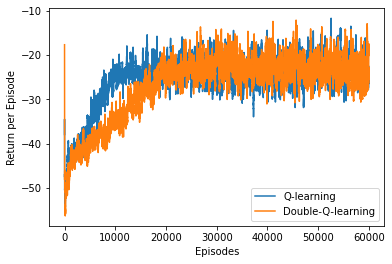

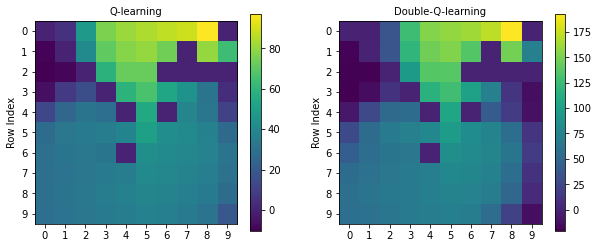

In [23]:
if __name__ == "__main__":
    main()

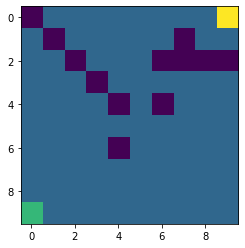

In [39]:
GridWorld = GridWorld()
table = np.zeros((GridWorld.row_max, GridWorld.col_max))
table[GridWorld.trap_location1] = -1
table[GridWorld.trap_location2] = -1
table[GridWorld.trap_location3] = -1
table[GridWorld.trap_location4] = -1
table[GridWorld.trap_location5] = -1
table[GridWorld.trap_location6] = -1
table[GridWorld.trap_location7] = -1
table[GridWorld.trap_location8] = -1
table[GridWorld.trap_location9] = -1
table[GridWorld.trap_location10] = -1
table[GridWorld.trap_location11] = -1
table[GridWorld.trap_location12] = -1
table[GridWorld.goal_location] = 2
table[(9,0)] = 1

plt.imshow(table)
